In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv("pakwheels_used_car_data_v02.csv")

# Understanding of Data

In [85]:
df.shape

(77878, 14)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77878 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        77878 non-null  int64  
 1   city          77878 non-null  object 
 2   assembly      24189 non-null  object 
 3   body          68974 non-null  object 
 4   make          77878 non-null  object 
 5   model         77878 non-null  object 
 6   year          73099 non-null  float64
 7   engine        77875 non-null  float64
 8   transmission  77878 non-null  object 
 9   fuel          76972 non-null  object 
 10  color         76398 non-null  object 
 11  registered    77878 non-null  object 
 12  mileage       77878 non-null  int64  
 13  price         77295 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 8.3+ MB


In [87]:
df.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


In [88]:
df.describe()

,addref,year,engine,mileage,price
count,7.787800e+04,73099.000000,77875.000000,77878.000000,7.729500e+04
mean,7.809878e+06,2012.812610,1408.072550,91109.192750,3.883232e+06
std,2.599523e+05,7.516685,704.459947,89275.336173,5.759480e+06
min,2.748970e+05,1990.000000,3.000000,1.000000,1.100000e+05
25%,7.805760e+06,2007.000000,1000.000000,34000.000000,1.450000e+06
50%,7.865805e+06,2015.000000,1300.000000,80000.000000,2.700000e+06
75%,7.910334e+06,2019.000000,1600.000000,123456.000000,4.500000e+06
max,7.943741e+06,2022.000000,15000.000000,1000000.000000,5.290000e+08


In [89]:
df.dtypes

addref            int64
city             object
assembly         object
body             object
make             object
model            object
year            float64
engine          float64
transmission     object
fuel             object
color            object
registered       object
mileage           int64
price           float64
dtype: object

In [90]:
df.nunique()

addref          77878
city              297
assembly            1
body               21
make               68
model             435
year               33
engine            229
transmission        2
fuel                3
color             396
registered        121
mileage          9345
price            2323
dtype: int64

In [91]:
df.drop("addref",inplace=True,axis=1)

In [92]:
null_values = df.isnull().sum()
null_values

city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

In [93]:
per = null_values / len(df)*100
per

city             0.000000
assembly        68.939880
body            11.433267
make             0.000000
model            0.000000
year             6.136521
engine           0.003852
transmission     0.000000
fuel             1.163358
color            1.900408
registered       0.000000
mileage          0.000000
price            0.748607
dtype: float64

In [94]:
missing_values = pd.DataFrame({"number":null_values,"Percentage":per}).sort_values("number",ascending=False)

In [95]:
missing_values

,number,Percentage
assembly,53689,68.939880
body,8904,11.433267
year,4779,6.136521
color,1480,1.900408
fuel,906,1.163358
price,583,0.748607
engine,3,0.003852
city,0,0.000000
make,0,0.000000
model,0,0.000000


# Handle Missing values

In [96]:
df["assembly"] = df["assembly"].fillna("Local")

In [97]:
columns_with_missing = ['body', 'year', 'engine', 'fuel', 'color', 'price']

In [98]:
df.dropna(subset=columns_with_missing,inplace=True)

In [99]:
df.isnull().sum()

city            0
assembly        0
body            0
make            0
model           0
year            0
engine          0
transmission    0
fuel            0
color           0
registered      0
mileage         0
price           0
dtype: int64

In [100]:
df.duplicated().sum()

307

In [101]:
df.drop_duplicates(inplace=True)

In [102]:
df.shape

(63063, 13)

# Detect outliers

In [103]:
def detect_outliers_iqr(df, column):
    df = df.sort_values(column)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [104]:
numerical_columns = ['year', 'engine', 'mileage', 'price']

In [105]:
outliers = {}

for column in numerical_columns:
    outliers[column] = detect_outliers_iqr(df, column)

* In this case these values are not outliers
* Beacuse each car has its own year,engine capacity,mileage and price
* Will manage in the RobustScaler

# Exploratory Data Analysis and Visualization

In [106]:
num_cols=["engine","mileage"]

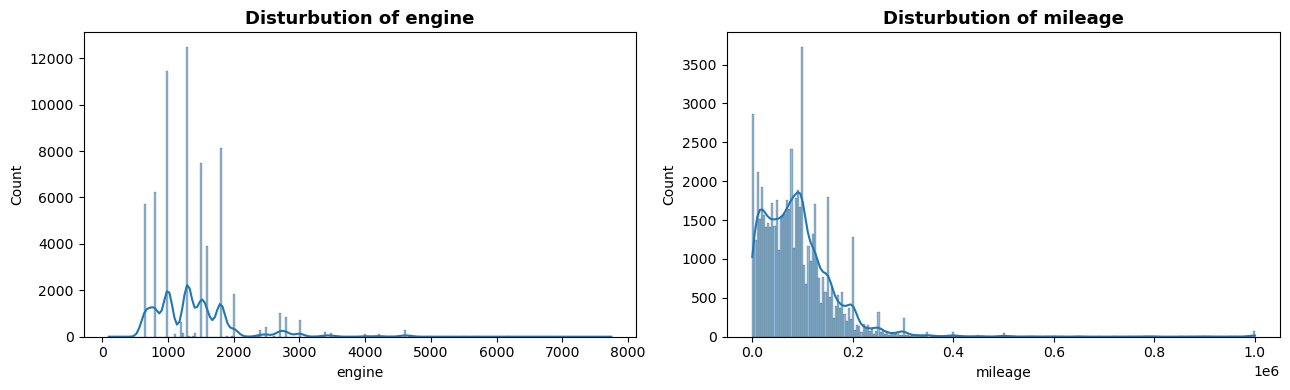

In [107]:
plt.figure(figsize=(13, 4))
for i, cols in enumerate(num_cols):
   plt.subplot(1, 2, i+1)
   sns.histplot(data=df, x=cols, kde=True)
   plt.title(f"Disturbution of {cols}", fontweight="black", size=13)

plt.tight_layout()
plt.show()

<img src="skew.jpg" alt="Cat" style="width:300px;"/>


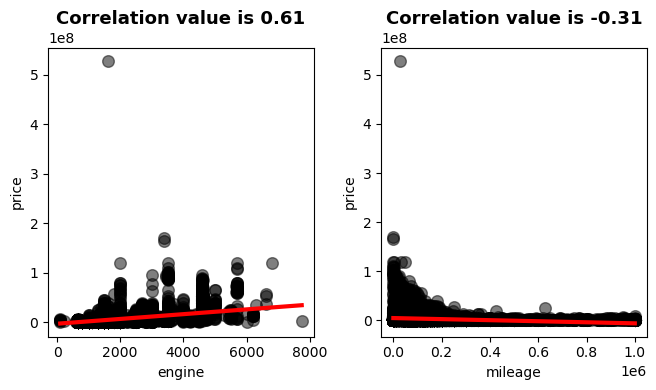

In [108]:
plt.figure(figsize=(10,4))

for i, cols in enumerate(num_cols):
    plt.subplot(1, 3, i+1)

    sns.regplot(x=cols, y="price", data=df, color="black", scatter_kws={"s":70, "alpha":0.5},  line_kws={'color': 'red', 'lw': 3})
    corr=round(df[[cols, "price"]].corr(method="spearman")["price"][0], 2)
    plt.title(f"Correlation value is {corr}",size=13 ,fontweight="black")
plt.tight_layout()
plt.show()

In [109]:
numerical_columns.remove("year")

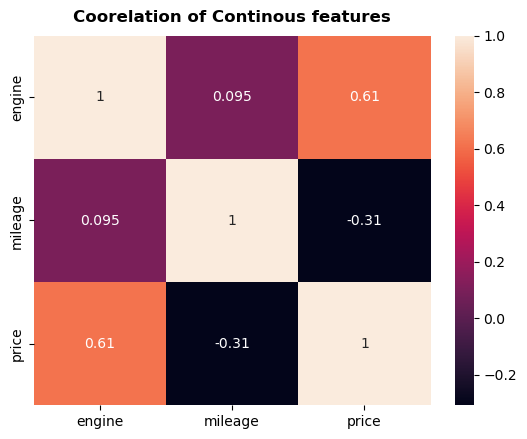

In [110]:
corr = df[numerical_columns].corr(method="spearman")
sns.heatmap(corr,annot=True)
plt.title("Coorelation of Continous features", fontweight="black", size=12 ,pad=10)
plt.show()

In [111]:
categorical_columns = ["assembly","transmission","fuel"]

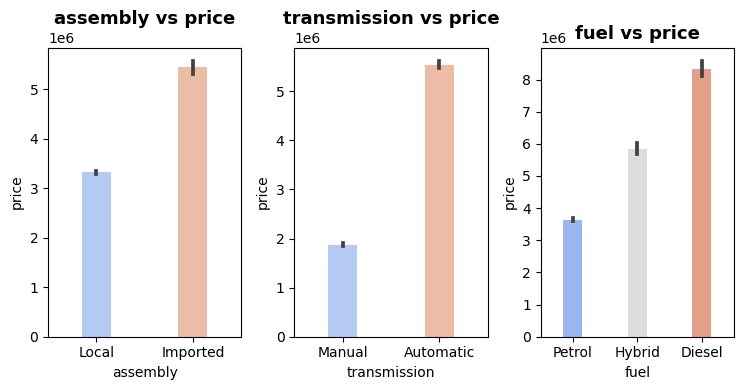

In [112]:
plt.figure(figsize=(10,4))

for i, cols in enumerate(categorical_columns):
    plt.subplot(1,4 , i+1)
    sns.barplot(data=df, x=cols, y="price", width=0.3 ,palette="coolwarm")
    plt.title(f"{cols} vs price", fontweight="black", size=13)

plt.tight_layout()
plt.show()


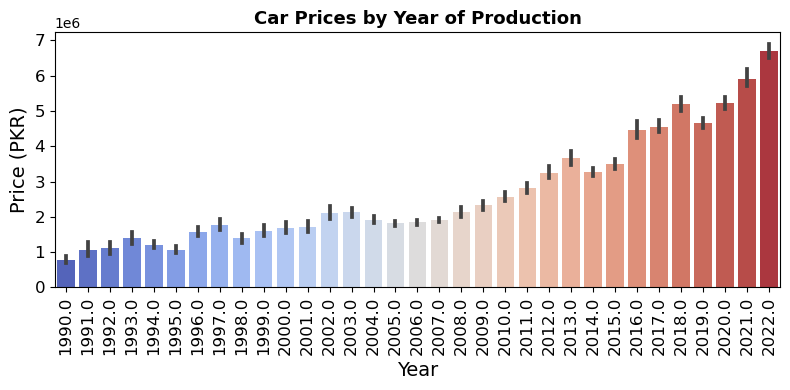

In [113]:
plt.figure(figsize=(8, 4))

sns.barplot(x='year', y='price', data=df, palette="coolwarm")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (PKR)', fontsize=14)
plt.title('Car Prices by Year of Production', fontsize=13, fontweight="black")
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [114]:
df_mean_price_by_body = df.groupby("body")['price'].mean().reset_index()
df_mean_price_by_body = df_mean_price_by_body.sort_values("price",ascending=False)

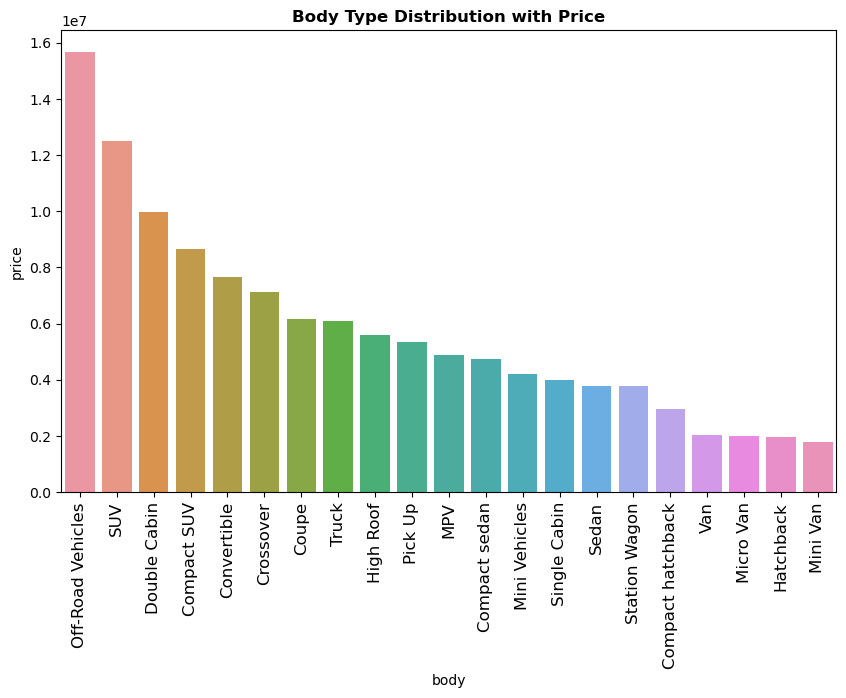

In [115]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_mean_price_by_body, x="body", y="price")
plt.title("Body Type Distribution with Price", fontweight="black")
plt.xticks(rotation=90, fontsize=12)
plt.show()

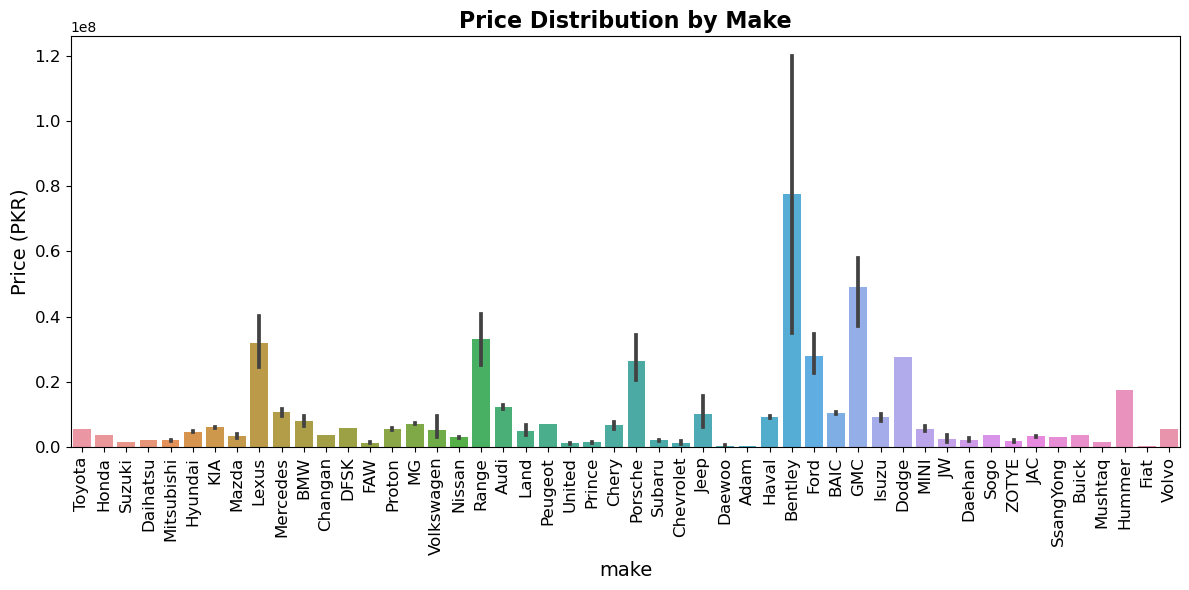

In [116]:
plt.figure(figsize=(12, 6))

sns.barplot(x='make', y='price', data=df)

#customize the labels
plt.xlabel('make', fontsize=14)
plt.ylabel('Price (PKR)', fontsize=14)

#assigning title
plt.title('Price Distribution by Make', fontweight="black", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [117]:
#Sort the city_stats DataFrame by 'price' in descending order and take the top 20 rows
city_stats = df.groupby('city')['price'].idxmax().reset_index()
top_cities = city_stats.sort_values(by='price', ascending=False).head(20)

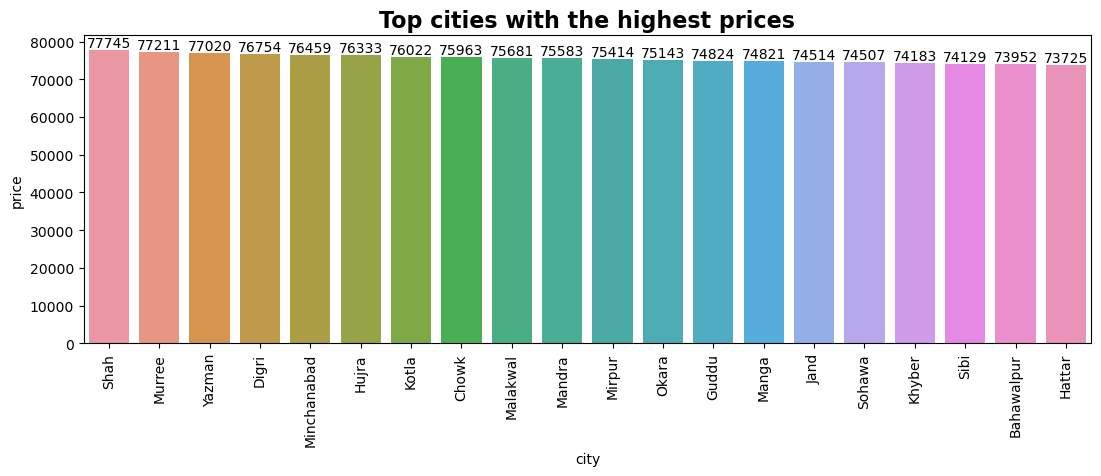

In [118]:
plt.figure(figsize=(13,4))
ax=sns.barplot(data=top_cities, x="city", y="price")
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Top cities with the highest prices', fontweight="black", fontsize=16)
plt.xticks(rotation=90)
plt.show()

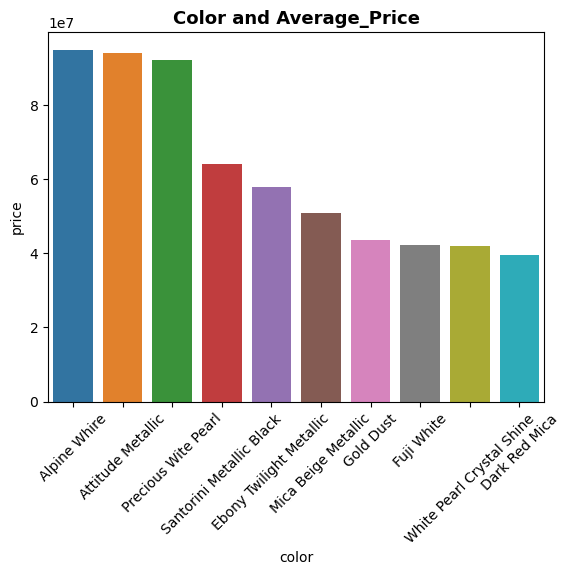

In [119]:
average_color = df.groupby("color")["price"].mean().reset_index().sort_values(ascending=False, by="price").head(10)

sns.barplot(x="color", y="price", data=average_color)
#assign the title
plt.title("Color and Average_Price", fontweight="black", size=13)
plt.xticks(rotation=45)
plt.show()

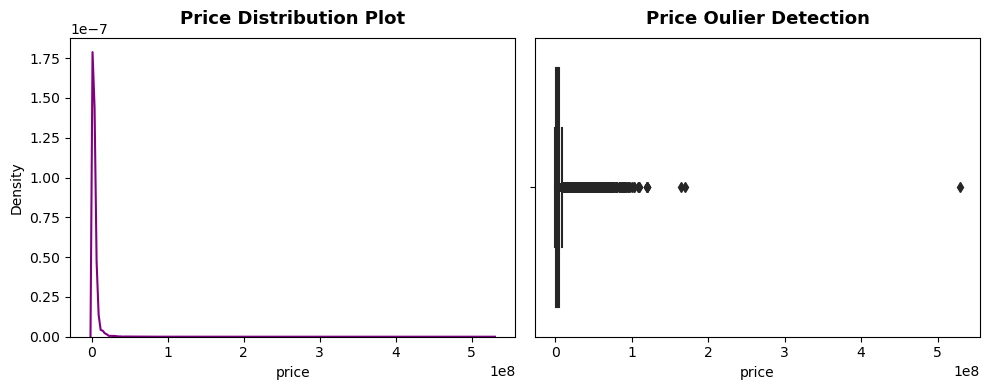

In [120]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="price",color="purple")
plt.title("Price Distribution Plot",fontweight="black",pad=10,size=13)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x= "price",color="purple")
plt.title("Price Oulier Detection",fontweight="black",pad=10,size=13)

plt.tight_layout()
plt.show()

# Hypothesis Testing

In [121]:
from scipy import stats

### Hypothesis 1

* Null Hypothesis: The mean price of cars with automatic transmission is equal to the mean price of cars with manual transmission.
* Alternative Hypothesis: The mean price of cars with automatic transmission is different from the mean price of cars with manual transmission.

In [122]:
automatic_prices = df[df['transmission'] == 'Automatic']['price']
manual_prices = df[df['transmission'] == 'Manual']['price']

In [123]:
t_stat, p_value = stats.ttest_ind(automatic_prices, manual_prices, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean price of cars with automatic transmission is different from the mean price of cars with manual transmission.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean price of cars with automatic and manual transmission.")

T-statistic: 94.06685861691713
P-value: 0.0
Reject the null hypothesis: The mean price of cars with automatic transmission is different from the mean price of cars with manual transmission.


### Hypothesis 2

* Null Hypothesis: The mean mileage of petrol cars is equal to the mean mileage of diesel cars.
* Alternative Hypothesis: The mean mileage of petrol cars is different from the mean mileage of diesel cars.

In [124]:
petrol_mileage = df[df['fuel'] == 'Petrol']['mileage']
diesel_mileage = df[df['fuel'] == 'Diesel']['mileage']

In [125]:

t_stat, p_value = stats.ttest_ind(petrol_mileage, diesel_mileage, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean mileage of petrol cars is different from the mean mileage of diesel cars.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean mileage of petrol and diesel cars.")


T-statistic: -8.244286092983995
P-value: 2.7895113427299616e-16
Reject the null hypothesis: The mean mileage of petrol cars is different from the mean mileage of diesel cars.


# Apply Transformations

In [126]:
df.drop("mileage",axis=1,inplace=True)

In [127]:
df.head()

,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,price
0,Peshawar,Local,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,2870000.0
1,Lahore,Local,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,995000.0
2,Lahore,Local,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,3585000.0
3,Lahore,Local,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,2250000.0
4,Lahore,Local,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,4850000.0


In [128]:
before_transformation = df.price
df['price'] = np.log1p(df['price'])

Skewness was 21.24 before & is 0.1 after log transformation.


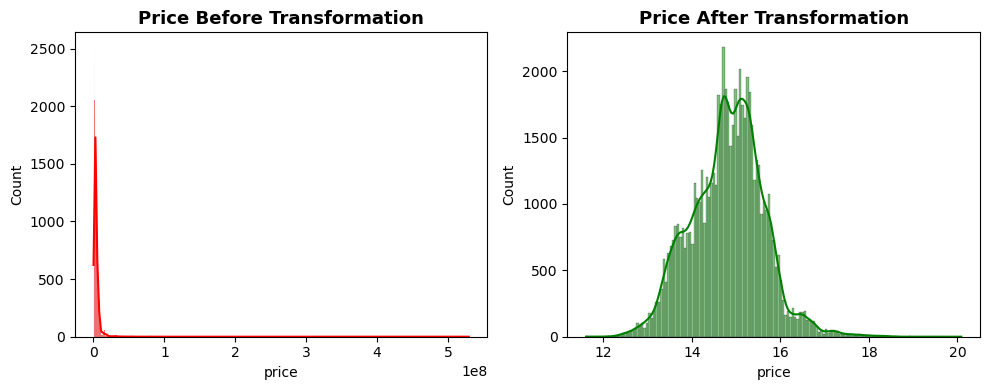

In [129]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
sns.histplot(x=before_transformation,  kde=True, color="red")
plt.title("Price Before Transformation", size=13 ,fontweight="black")

plt.subplot(1, 2, 2)
sns.histplot(x="price", data=df, kde=True, color="green")
plt.title("Price After Transformation", size=13 ,fontweight="black")

print(f"Skewness was {round(before_transformation.skew(),2)} before & is {round(df['price'].skew(),2)} after log transformation.")

plt.tight_layout()
plt.show()


In [130]:
cat_cols= ['assembly', 'transmission', 'fuel']

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [131]:
df.head()

,city,body,make,model,year,engine,color,registered,price,assembly_Local,transmission_Manual,fuel_Hybrid,fuel_Petrol
0,Peshawar,Sedan,Toyota,Corolla,2013.0,1300.0,Silver Metallic,Lahore,14.869823,1,1,0,1
1,Lahore,Sedan,Honda,City,2000.0,1300.0,Blue,Lahore,13.810499,1,1,0,1
2,Lahore,Sedan,Toyota,Yaris,2021.0,1300.0,Super White,Punjab,15.092269,1,1,0,1
3,Lahore,Hatchback,Suzuki,Swift,2017.0,1300.0,Grey,Islamabad,14.626441,1,1,0,1
4,Lahore,Sedan,Honda,Civic,2017.0,1800.0,Grey,Lahore,15.394489,1,0,0,1


In [45]:
card_feat = ['year','body', 'make','city','color', 'registered', 'model']

for cols in card_feat:
    data = df.groupby(cols)["price"].mean()
    for value in data.index:
       df[cols]= df[cols].replace({value:data[value]})

In [46]:
df.head()

,city,body,make,model,year,engine,color,registered,price,assembly_Local,transmission_Manual,fuel_Hybrid,fuel_Petrol
0,14.837882,14.951540,15.228398,15.021952,14.802397,1300.0,14.827994,14.586162,14.869823,1,1,0,1
1,14.932365,14.951540,14.968542,14.858969,14.048309,1300.0,14.368475,14.586162,13.810499,1,1,0,1
2,14.932365,14.951540,15.228398,15.318402,15.405215,1300.0,15.600188,14.930541,15.092269,1,1,0,1
3,14.932365,14.304586,14.127540,14.741430,15.064181,1300.0,14.515703,15.124283,14.626441,1,1,0,1
4,14.932365,14.951540,14.968542,14.948944,15.064181,1800.0,14.515703,14.586162,15.394489,1,0,0,1


In [47]:
from scipy.special import boxcox1p

from scipy.stats import boxcox_normmax

from sklearn.preprocessing import RobustScaler

In [48]:
b= df["engine"]
df["engine"] = boxcox1p(df["engine"], boxcox_normmax(df["engine"] + 1))

Skewness was 2.17 before & is 0.09 after BoxCox transformation.


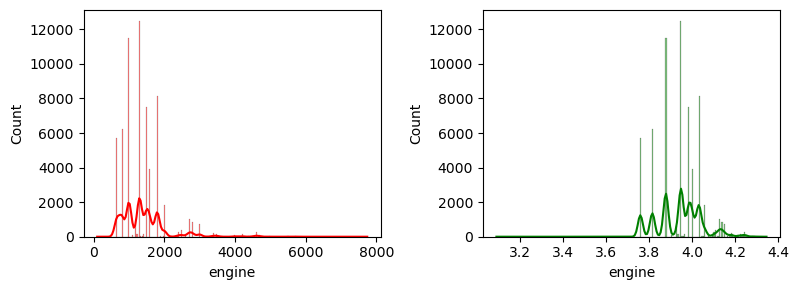

In [49]:
plt.figure(figsize=(8,3))


plt.subplot(1, 2, 1)
sns.histplot(x=b, kde=True, color="red")

plt.subplot(1, 2, 2)
sns.histplot(x="engine", data=df, kde=True, color="green")

print(f"Skewness was {round(b.skew(),2)} before & is {round(df['engine'].skew(),2)} after BoxCox transformation.")

plt.tight_layout()
plt.show()

# Seperating X and y values

In [52]:
X= df.drop(columns="price", axis=1)
y= df["price"]

In [53]:
X.shape

(63063, 12)

In [54]:
scalar = RobustScaler()
X_scaled = scalar.fit_transform(X)

In [55]:
X_scaled.shape

(63063, 12)

# Applying Machine Learning Models

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [58]:
mse_value = []

In [59]:
def model_evaluation(model):
     model.fit(X_train, y_train)
     train_pred=model.predict(X_train)
     test_pred=model.predict(X_test)

     # metrices calculations
     mse= mean_squared_error(y_test, test_pred)
     rmse= np.sqrt(mse)

     #append the results
     mse_value.append(mse)

     print(f"MSE of {model} model is==> ", mse)
     print(f"RMSE of {model} model is==> ", rmse)

     #scatter plot
     plt.figure(figsize= (8,6))
     sns.scatterplot(x=y_test, y=test_pred, color="blue",label='Actual Data Points')
     plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", label="Ideal Line")
     plt.xlabel('True values')
     plt.ylabel('Predicted values')
     plt.legend()
     plt.title('Scatter Plot',fontweight="black",size=20,pad=10)
     plt.show()


In [60]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'SVR': SVR(kernel='linear'),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

MSE of LinearRegression() model is==>  0.05655778251672335
RMSE of LinearRegression() model is==>  0.23781880185705115


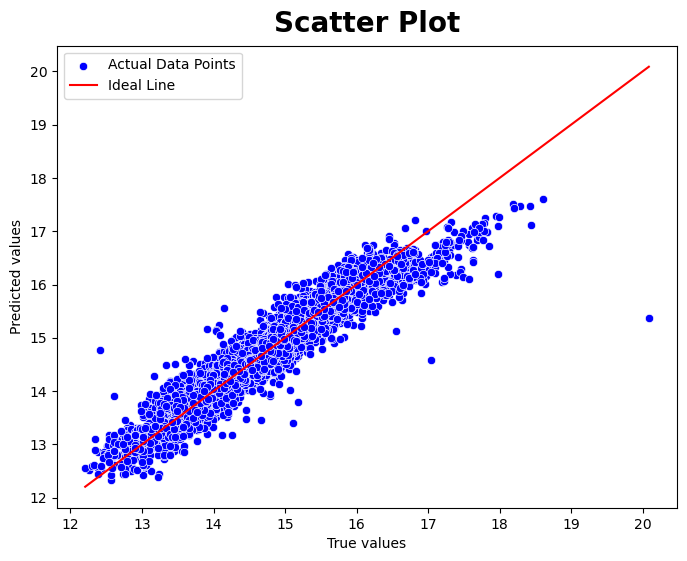


MSE of Ridge() model is==>  0.05655748696883524
RMSE of Ridge() model is==>  0.23781818048424144


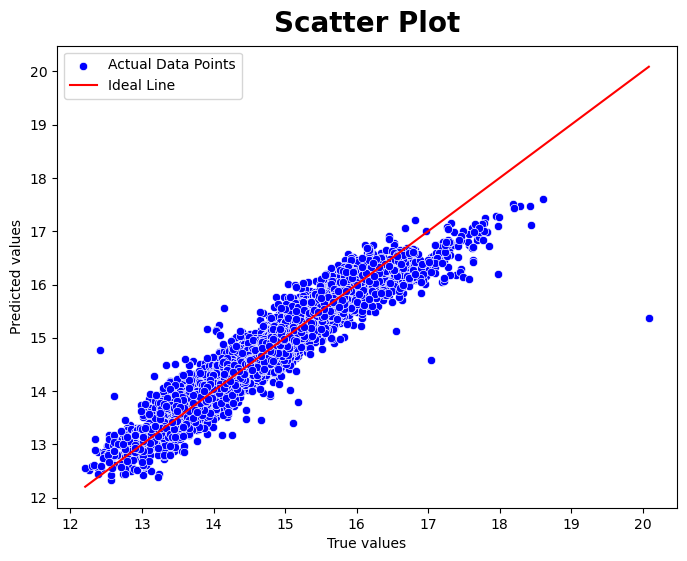


MSE of Lasso(alpha=0.1) model is==>  0.13252043078584214
RMSE of Lasso(alpha=0.1) model is==>  0.3640335572249379


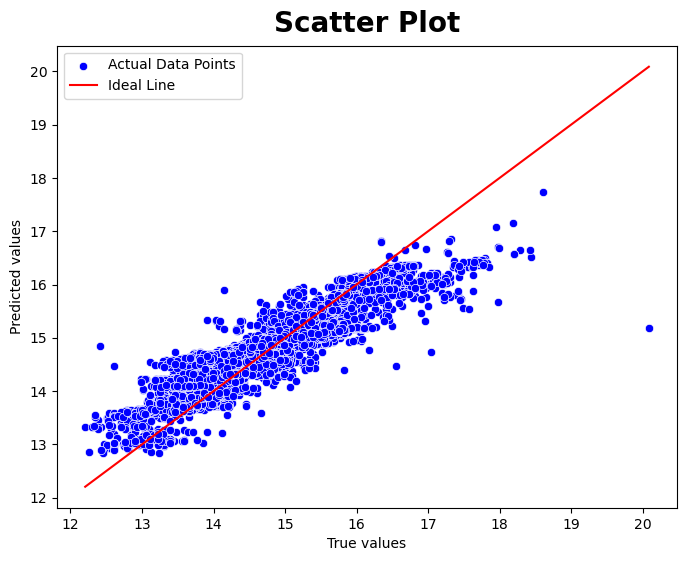


MSE of SVR(kernel='linear') model is==>  0.057553457575635
RMSE of SVR(kernel='linear') model is==>  0.23990301702070152


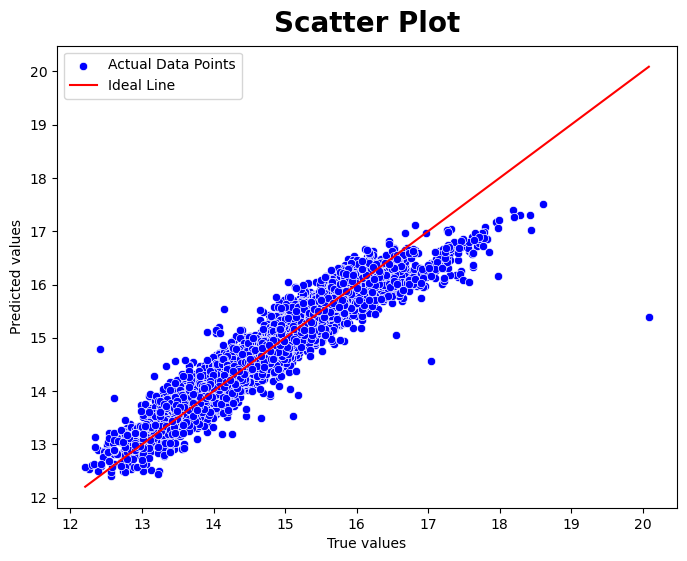


MSE of RandomForestRegressor() model is==>  0.01992560417535933
RMSE of RandomForestRegressor() model is==>  0.1411580822176305


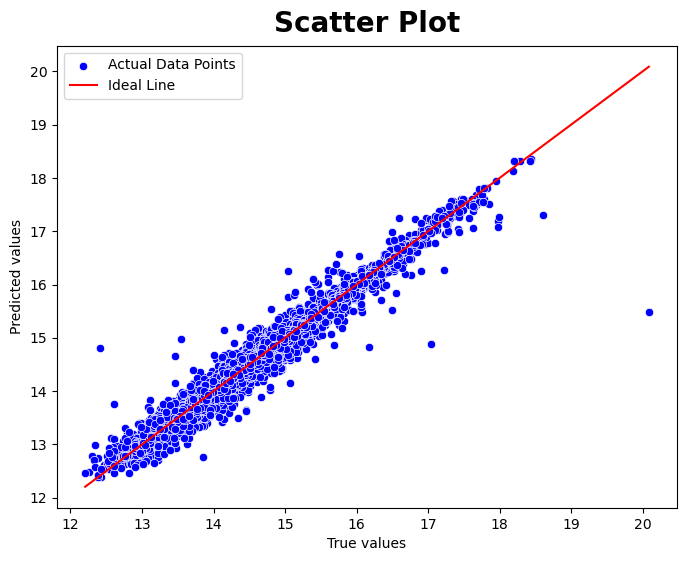

In [61]:
for i,j in models.items():
    model_evaluation(j)
    print()

## Model's Summary

In [73]:
summary = pd.DataFrame({"Models":models.keys(),"Mean_Squared_Error":mse_value})

In [74]:
summary

,Models,Mean_Squared_Error
0,Linear Regression,0.056558
1,Ridge Regression,0.056557
2,Lasso Regression,0.132520
3,SVR,0.057553
4,Random Forest,0.019926


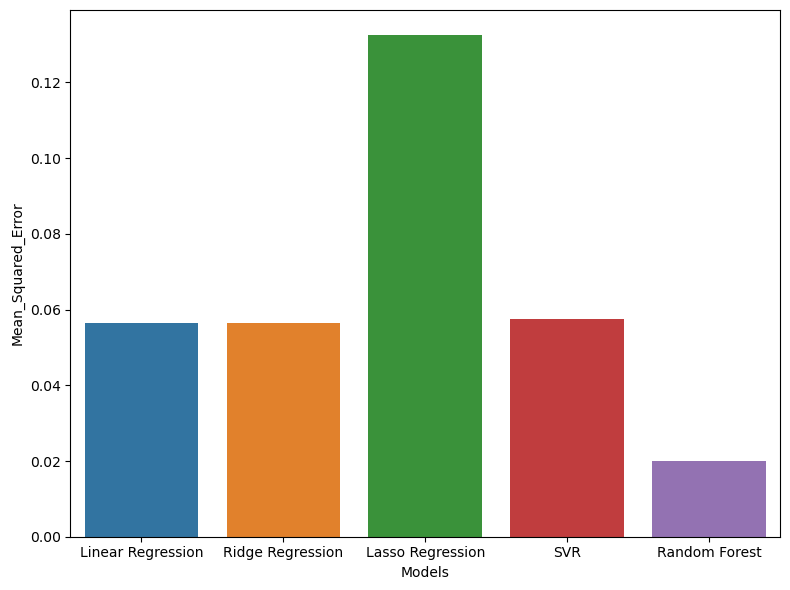

In [77]:
plt.figure(figsize= (8,6))
sns.barplot(x="Models",y="Mean_Squared_Error",data = summary)
plt.tight_layout()
plt.show()

# Project Report

In part of understanding of dataset, I explored all the columns, their datatype and null values in the dataset.
I explored dataset summary and info that tell me about the datset columns more. I displayed the percentage of missing values 
for each column and drop the column that is not valid data. This column has only IDs.

Next I handle the missing values as assembly column has many missing values that i filled by loacal opposite to imported and drop
rows that has maximum missing values and these rows did not effect entire dataset.

In part of EDA and visulaization, I tried to see trend of each column with the predicted column that is price.
I find the correlation of numerical columns with the price column and drop one numerical column because it has very weak
relation with the price.
I displayed a barchart of categorical columns with the price to check that which type of each category has high price.
In the same way i display a barchart with each qualitative column with the price to display that which type of each column has high price
and which has low price

Hypothesis Testing 1, I wanted to check that the mean price of cars with automatic transmission is equal to the mean price of cars with manual transmission
and the result is shown above .
Hypothesis Testing 2, I wanted to check that the mean mileage of petrol cars is equal to the mean mileage of diesel cars and the result is shown above.

In part of transformation, I applies logarithmic transformation to the predicted column to remove its skewness.
Convert all categorical columns into ONE-HOT encoding beacuse it makes it easy to handle categorical values.
Finally I applied boxcox transformation to the engine column to convert into a choice scale.

Seperate X and y values for model training and testing and I passed 5 Regression models and summary of each model is shown above
and RandomForestRegressor has less MSE among all so it is best for our data.